In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

#### Reading file

In [2]:
dataset = pd.read_csv('training-ds.csv', encoding='utf-8')
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [3]:
dataset[:10]

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto
5,3G,No,Escuela,No,Público,Nov-15,Smartphone,Compra Megas,Media,Masculino,0,Bajo
6,4G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
7,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
8,4G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Alto
9,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar,Moderado


In [4]:
#dummies = pd.get_dummies(dataset['Tipo de Red'], drop_first=True)  
# drop_first se usa para eliminar una columna (categoria), ya que si no corresponde a las otras automaticamente es esa.
# reduces una columan innecesaria
dataset_one_hot_encoded = pd.get_dummies(dataset)  
dataset_one_hot_encoded

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
960,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
961,0,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
962,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


#### Divide datset into x and y:

In [5]:
X = dataset_one_hot_encoded.iloc[:,:31]
X

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
4,0,0,1,0,1,0,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0
960,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
961,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
962,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0


In [10]:
y = dataset_one_hot_encoded.iloc[:,31:]
y

,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
959,0,0,1
960,0,0,1
961,0,1,0
962,0,0,1


#### Divide dataset into training and testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(771, 31) (771, 3)
(193, 31) (193, 3)


#### Train the network:

In [12]:
model = tf.keras.Sequential([
      #tf.keras.layers.Flatten(input_shape=(31)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

In [13]:
model.compile()
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [21]:
learning_rate = 0.01
batch_size = 64

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)
model.fit(X_train, y_train, epochs = 300, verbose=1, batch_size = batch_size)

Epoch 1/300
13/13 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.7743
Epoch 2/300
13/13 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7769
Epoch 3/300
13/13 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7756
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7717
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7756
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5296 - accuracy: 0.7769
Epoch 7/300
13/13 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.7782
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7769
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7730
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7795
Epoch 11/

In [22]:

print('\nEvaluating:')
(test_loss, test_accuracy) = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')


Evaluating:
7/7 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7720

Test accuracy: 77.2%, test loss: 0.559833


#### Analyze data correlation:

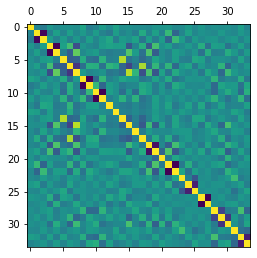

In [49]:
dataset_correlation = dataset_one_hot_encoded.corr(method='pearson')#.iloc[:,31:34]
plt.matshow(dataset_correlation)
plt.show()
# dataset_correlation = dataset_one_hot_encoded.corr(method='pearson')
# sns.heatmap(dataset_correlation, annot=True)
# plt.show()

In [62]:
dataset_one_hot_encoded.corr(method='pearson')

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
Tipo de Red_2G,1.000000,-0.088830,-0.171879,0.053684,-0.053684,0.006022,0.007856,-0.012790,0.158184,-0.158184,...,0.085195,-0.056884,0.055247,-0.055247,0.002965,-0.010681,0.010369,-0.039096,0.120911,-0.096155
Tipo de Red_3G,-0.088830,1.000000,-0.965956,-0.132228,0.132228,-0.098634,0.129379,-0.053763,0.084216,-0.084216,...,0.142381,-0.076770,0.022792,-0.022792,-0.061730,0.070343,-0.030988,-0.064461,0.066596,-0.028605
Tipo de Red_4G,-0.171879,-0.965956,1.000000,0.116833,-0.116833,0.095987,-0.129999,0.056495,-0.124377,0.124377,...,-0.162947,0.090702,-0.036891,0.036891,0.060283,-0.066797,0.027955,0.073909,-0.097270,0.053266
Estudiante de Tecnología_No,0.053684,-0.132228,0.116833,1.000000,-1.000000,0.137056,0.399288,-0.516012,0.043161,-0.043161,...,0.083443,-0.052858,0.244509,-0.244509,0.126201,0.101727,-0.235267,-0.063813,0.133308,-0.094265
Estudiante de Tecnología_Si,-0.053684,0.132228,-0.116833,-1.000000,1.000000,-0.137056,-0.399288,0.516012,-0.043161,0.043161,...,-0.083443,0.052858,-0.244509,0.244509,-0.126201,-0.101727,0.235267,0.063813,-0.133308,0.094265
Nivel de Educación_Colegio,0.006022,-0.098634,0.095987,0.137056,-0.137056,1.000000,-0.413815,-0.370882,0.237095,-0.237095,...,-0.145393,0.198741,0.143822,-0.143822,0.008401,0.015089,-0.025777,-0.117979,0.163156,-0.092745
Nivel de Educación_Escuela,0.007856,0.129379,-0.129999,0.399288,-0.399288,-0.413815,1.000000,-0.691958,-0.262542,0.262542,...,0.164186,-0.189388,0.079022,-0.079022,-0.029791,0.297081,-0.334976,0.014511,-0.087390,0.077296
Nivel de Educación_Universidad,-0.012790,-0.053763,0.056495,-0.516012,0.516012,-0.370882,-0.691958,1.000000,0.079803,-0.079803,...,-0.052190,0.035593,-0.194666,0.194666,0.023729,-0.315025,0.362159,0.078757,-0.040238,-0.005303
Vive en Ciudad_No,0.158184,0.084216,-0.124377,0.043161,-0.043161,0.237095,-0.262542,0.079803,1.000000,-1.000000,...,0.044401,0.025392,0.039494,-0.039494,0.311256,-0.169950,-0.068423,-0.091963,0.245294,-0.187896
Vive en Ciudad_Si,-0.158184,-0.084216,0.124377,-0.043161,0.043161,-0.237095,0.262542,-0.079803,-1.000000,1.000000,...,-0.044401,-0.025392,-0.039494,0.039494,-0.311256,0.169950,0.068423,0.091963,-0.245294,0.187896


In [56]:
def is_relevant(dataset):
    return dataset['Nivel de Adaptación_Alto']>0.2 or dataset_one_hot_encoded['Nivel de Adaptación_Bajo' ] > 0.2 or dataset_one_hot_encoded['Nivel de Adaptación_Medio'] > 0.2

In [60]:
corr_dataset=dataset_one_hot_encoded.corr()
corr_dataset.where(corr_dataset['Nivel de Adaptación_Alto']>0.2)

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
Tipo de Red_2G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de Red_3G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de Red_4G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estudiante de Tecnología_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estudiante de Tecnología_Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nivel de Educación_Colegio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nivel de Educación_Escuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nivel de Educación_Universidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vive en Ciudad_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vive en Ciudad_Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
dataset_one_hot_encoded.loc[:,is_relevant(dataset_one_hot_encoded)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().